# N samples

In [1]:
import numpy as np
import tensorflow as tf

# Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]
N = X.shape[0]

# add 1
X = np.c_[np.ones((N, 1)), X]

# shuffle
inds = np.arange(N)
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

print(X[:7])
print(y[:7])

[[1.  5.  3.2 1.2 0.2]
 [1.  6.1 2.9 4.7 1.4]
 [1.  6.3 2.7 4.9 1.8]
 [1.  6.  3.  4.8 1.8]
 [1.  5.6 2.9 3.6 1.3]
 [1.  5.6 3.  4.5 1.5]
 [1.  6.4 3.2 5.3 2.3]]
[[0.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]]


In [2]:
# theta
D = 4 + 1
K = 3
theta = tf.Variable(tf.random.normal((D, K), dtype=tf.float64))
 
# forward
def compute_output(theta, X):
    return tf.math.softmax(X@theta)

In [3]:
# parameters
lr = 0.01
num_epochs = 1000
losses = [] # for debug

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

In [4]:
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = compute_output(theta, X)
        
        # loss
        loss = loss_fn(y, output)
        
    losses.append(loss.numpy())

    # gradient
    dtheta = t.gradient(loss, theta)

    # update
    theta.assign_sub(lr * dtheta)

In [ ]:
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        z = theta.T@x
        y_hat = softmax(z)
        
        # loss
        loss = loss_fn(y, y_hat)
        
    losses.append(loss.numpy())

    # gradient
    dtheta = t.gradient(loss, theta)

    # update
    theta.assign_sub(lr * dtheta)

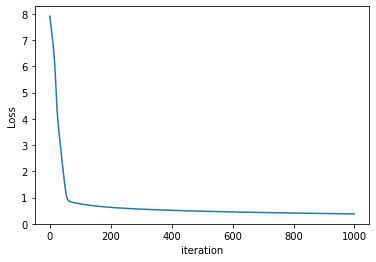

In [5]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()